In [1]:
import matplotlib.pyplot as plt
from math import sqrt
from collections import namedtuple
import pandas as pd
import os
import numpy as np
from scipy.stats import norm

In [2]:
Trait = namedtuple("Trait",["name",
                            "p_coding","p_noncoding","p_coding_se","p_noncoding_se",
                            "p_coding_err_min","p_coding_err_max","p_noncoding_err_min","p_noncoding_err_max",
                            "n_coding","n_noncoding","n_coding_se","n_noncoding_se","n_coding_err_min",
                            "n_coding_err_max","n_noncoding_err_min","n_noncoding_err_max",
                            "s_coding","s_noncoding","s_coding_se","s_noncoding_se",
                            "s_coding_err_min","s_coding_err_max","s_noncoding_err_min","s_noncoding_err_max",
                            "h2_coding","h2_noncoding","h2_coding_se","h2_noncoding_se",
                            "h2_noncoding_min","h2_noncoding_max","h2_coding_min","h2_coding_max",
                            "h2_coding_err_min","h2_coding_err_max","h2_noncoding_err_min","h2_noncoding_err_max",
                            "h2_total","h2_total_se","h2_min","h2_max",
                            "enrichment_noncoding","enrichment_coding",
                            "enrichment_noncoding_se","enrichment_coding_se",
                            "enrichment_noncoding_min","enrichment_noncoding_max",
                            "enrichment_coding_min","enrichment_coding_max",
                           "s02"])
n_coding_total = 151398
n_noncoding_total = 9845833
n_total = n_coding_total + n_noncoding_total
prop_n_c = n_coding_total/n_total
prop_n_nc = n_noncoding_total/n_total

In [3]:
# construct traits tuple
trait2plot = ["PGC_SCZ_2014_EUR",
              "PGC_BIP_2016",
              "PGC_ADHD_2017_EUR",
              "CTG_COG_2018",
              "SSGAC_EDU_2018_no23andMe",
              "DIAGRAM_T2D_2018_adjBMI",
              "IIBDGC_IBD_2017",
              "LIPIDS_LDL_2013",
              "GIANT_BMI_2018_UKB_v2",
              "GIANT_HEIGHT_2018_UKB",
              "GIANT_WHR_2015_EUR"]
# trait2plot = ["PGC_SCZ_2014_EUR",
#               "PGC_BIP_2016",
#               "PGC_ADHD_2017_EUR",
#               "CTG_COG_2018",
#               "CTG_INTELLIGENCE_2017",
#               "SSGAC_EDU_2018_no23andMe",
#               "DIAGRAM_T2D_2018_adjBMI",
#               "IIBDGC_IBD_2017",
#               "LIPIDS_LDL_2013",
#               "GIANT_BMI_2018_UKB_v2",
#               "GIANT_HEIGHT_2014",
#               "GIANT_HEIGHT_2018_UKB",
#               "GIANT_WHR_2015_EUR"]
tables_dir = "../../cmm_paper/data/e1_real"

traits = []
for t in trait2plot:
    fname = os.path.join(tables_dir, t+".csv")
    df = pd.read_csv(fname)
    sqrt_n = sqrt(df.shape[0])
    p_coding = df.p_c.mean()
    p_noncoding = df.p_nc.mean()
    p_coding_se = df.p_c.std()/sqrt_n
    p_noncoding_se = df.p_nc.std()/sqrt_n
    p_coding_err_min = p_coding-df.p_c.min()
    p_coding_err_max = df.p_c.max()-p_coding
    p_noncoding_err_min = p_noncoding-df.p_nc.min()
    p_noncoding_err_max = df.p_nc.max()-p_noncoding
    n_coding = df.p_c.mean()*n_coding_total
    n_noncoding = df.p_nc.mean()*n_noncoding_total
    n_coding_se = (n_coding_total*df.p_c).std()/sqrt_n
    n_noncoding_se = (n_noncoding_total*df.p_nc).std()/sqrt_n
    
    n_coding_err_min = n_coding-df.p_c.min()*n_coding_total
    n_coding_err_max = df.p_c.max()*n_coding_total-n_coding
    n_noncoding_err_min = n_noncoding-df.p_nc.min()*n_noncoding_total
    n_noncoding_err_max = df.p_nc.max()*n_noncoding_total-n_noncoding
    
    s_coding = df.s2_c.mean()
    s_noncoding = df.s2_nc.mean()
    s_coding_se = df.s2_c.std()/sqrt_n
    s_noncoding_se = df.s2_nc.std()/sqrt_n
    s_coding_err_min = s_coding-df.s2_c.min()
    s_coding_err_max = df.s2_c.max()-s_coding
    s_noncoding_err_min = s_noncoding-df.s2_nc.min()
    s_noncoding_err_max = df.s2_nc.max()-s_noncoding
    h2_coding = df.h2_c.mean()
    h2_noncoding = df.h2_nc.mean()
    h2_coding_se = df.h2_c.std()/sqrt_n
    h2_noncoding_se = df.h2_nc.std()/sqrt_n
    h2_coding_err_min = h2_coding-df.h2_c.min()
    h2_coding_err_max = df.h2_c.max()-h2_coding
    h2_noncoding_err_min = h2_noncoding-df.h2_nc.min()
    h2_noncoding_err_max = df.h2_nc.max()-h2_noncoding
    h2_noncoding_min = df.h2_nc.min()
    h2_noncoding_max = df.h2_nc.max()
    h2_coding_min = df.h2_c.min()
    h2_coding_max = df.h2_nc.max()
    
    h2 = df.h2_c + df.h2_nc
    h2_min = (df.h2_c + df.h2_nc).min()
    h2_max = (df.h2_c + df.h2_nc).max()
    h2_total = h2.mean()
    h2_total_se = h2.std()/sqrt_n
    prop_h2_c = df.h2_c/h2
    prop_h2_nc = df.h2_nc/h2
    enrichment_c = prop_h2_c/prop_n_c
    enrichment_nc = prop_h2_nc/prop_n_nc
    
    enrichment_noncoding = enrichment_nc.mean()
    enrichment_coding = enrichment_c.mean()
    enrichment_noncoding_se = enrichment_nc.std()/sqrt_n
    enrichment_coding_se = enrichment_c.std()/sqrt_n
    enrichment_noncoding_min = enrichment_nc.min()
    enrichment_noncoding_max = enrichment_nc.max()
    enrichment_coding_min = enrichment_c.min()
    enrichment_coding_max = enrichment_c.max()
    
    s02 = df.s02.mean()
    
    name = " ".join(t.split("_")[1:3])
    trait = Trait(name=name,
                  p_coding=p_coding,p_noncoding=p_noncoding,p_coding_se=p_coding_se,p_noncoding_se=p_noncoding_se,
                  p_coding_err_min=p_coding_err_min,p_coding_err_max=p_coding_err_max,p_noncoding_err_min=p_noncoding_err_min,p_noncoding_err_max=p_noncoding_err_max,
                  n_coding=n_coding,n_noncoding=n_noncoding,n_coding_se=n_coding_se,
                  n_noncoding_se=n_noncoding_se,n_coding_err_min = n_coding_err_min,n_coding_err_max = n_coding_err_max,n_noncoding_err_min = n_noncoding_err_min,n_noncoding_err_max = n_noncoding_err_max,
                  s_coding=s_coding,s_noncoding=s_noncoding,s_coding_se=s_coding_se,
                  s_noncoding_se=s_noncoding_se,
                  s_coding_err_min=s_coding_err_min,s_coding_err_max=s_coding_err_max,s_noncoding_err_min=s_noncoding_err_min,s_noncoding_err_max=s_noncoding_err_max,
                  h2_coding=h2_coding,h2_noncoding=h2_noncoding,
                  h2_coding_se=h2_coding_se,h2_noncoding_se=h2_noncoding_se,h2_total=h2_total,h2_total_se=h2_total_se,
                  h2_coding_err_min=h2_coding_err_min,h2_coding_err_max=h2_coding_err_max,h2_noncoding_err_min=h2_noncoding_err_min,h2_noncoding_err_max=h2_noncoding_err_max,
                  h2_min=h2_min,h2_max=h2_max,
                  h2_noncoding_min=h2_noncoding_min,h2_noncoding_max=h2_noncoding_max,
                  h2_coding_min=h2_coding_min,h2_coding_max=h2_coding_max,
                  enrichment_noncoding=enrichment_noncoding,enrichment_coding=enrichment_coding,
                  enrichment_noncoding_se=enrichment_noncoding_se,enrichment_coding_se=enrichment_coding_se,
                  enrichment_noncoding_min=enrichment_noncoding_min,enrichment_noncoding_max=enrichment_noncoding_max,
                  enrichment_coding_min=enrichment_coding_min,enrichment_coding_max=enrichment_coding_max,
                  s02=s02)
    traits.append(trait)

In [4]:
# intelligence = Trait(name = "Intelligence",
#                      n_coding = n_coding_total*1.65E-02,
#                      n_noncoding = n_noncoding_total*9.31E-04,
#                      s_coding = 5.67E-05,
#                      s_noncoding = 4.86E-05,
#                      h2_coding = 0.0292*100,
#                      h2_noncoding = 0.1056*100)
# scz = Trait(name = "SCZ",
#             n_coding = n_coding_total*1.80E-02,
#             n_noncoding = n_noncoding_total*2.24E-03,
#             s_coding = 1.02E-04,
#             s_noncoding = 5.84E-05,
#             h2_coding = 0.0570*100,
#             h2_noncoding = 0.3047*100)
# bip = Trait(name = "BIP",
#             n_coding = n_coding_total*1.74E-02,
#             n_noncoding = n_noncoding_total*1.77E-03,
#             s_coding = 1.08E-04,
#             s_noncoding = 4.71E-05,
#             h2_coding = 0.0583*100,
#             h2_noncoding = 0.1939*100)
# height = Trait(name = "Height",
#                n_coding = n_coding_total*6.40E-02,
#                n_noncoding = n_noncoding_total*5.01E-04,
#                s_coding = 8.27E-05,
#                s_noncoding = 2.94E-04,
#                h2_coding = 0.1650*100,
#                h2_noncoding = 0.3439*100)
# ibd = Trait(name = "IBD",
#             n_coding = n_coding_total*1.56E-02,
#             n_noncoding = n_noncoding_total*2.05E-05,
#             s_coding = 2.73E-04,
#             s_noncoding = 2.37E-03,
#             h2_coding = 0.1328*100,
#             h2_noncoding = 0.1134*100)
# t2d = Trait(name = "T2D",
#             n_coding = n_coding_total*4.34E-02,
#             n_noncoding = n_noncoding_total*5.48E-05,
#             s_coding = 4.54E-05,
#             s_noncoding = 5.41E-04,
#             h2_coding = 0.0614*100,
#             h2_noncoding = 0.0692*100)
# traits = (intelligence, scz, bip, height, ibd, t2d)
# #             orange, sky_blue, bluish_green, yellow, reddish_purple, vermillion, blue, black
# CB_COLORS = ["#e69f00","#56b4e9","#009e73","#f0e442","#cc79a7","#d55e00","#0072b2","#000000"]

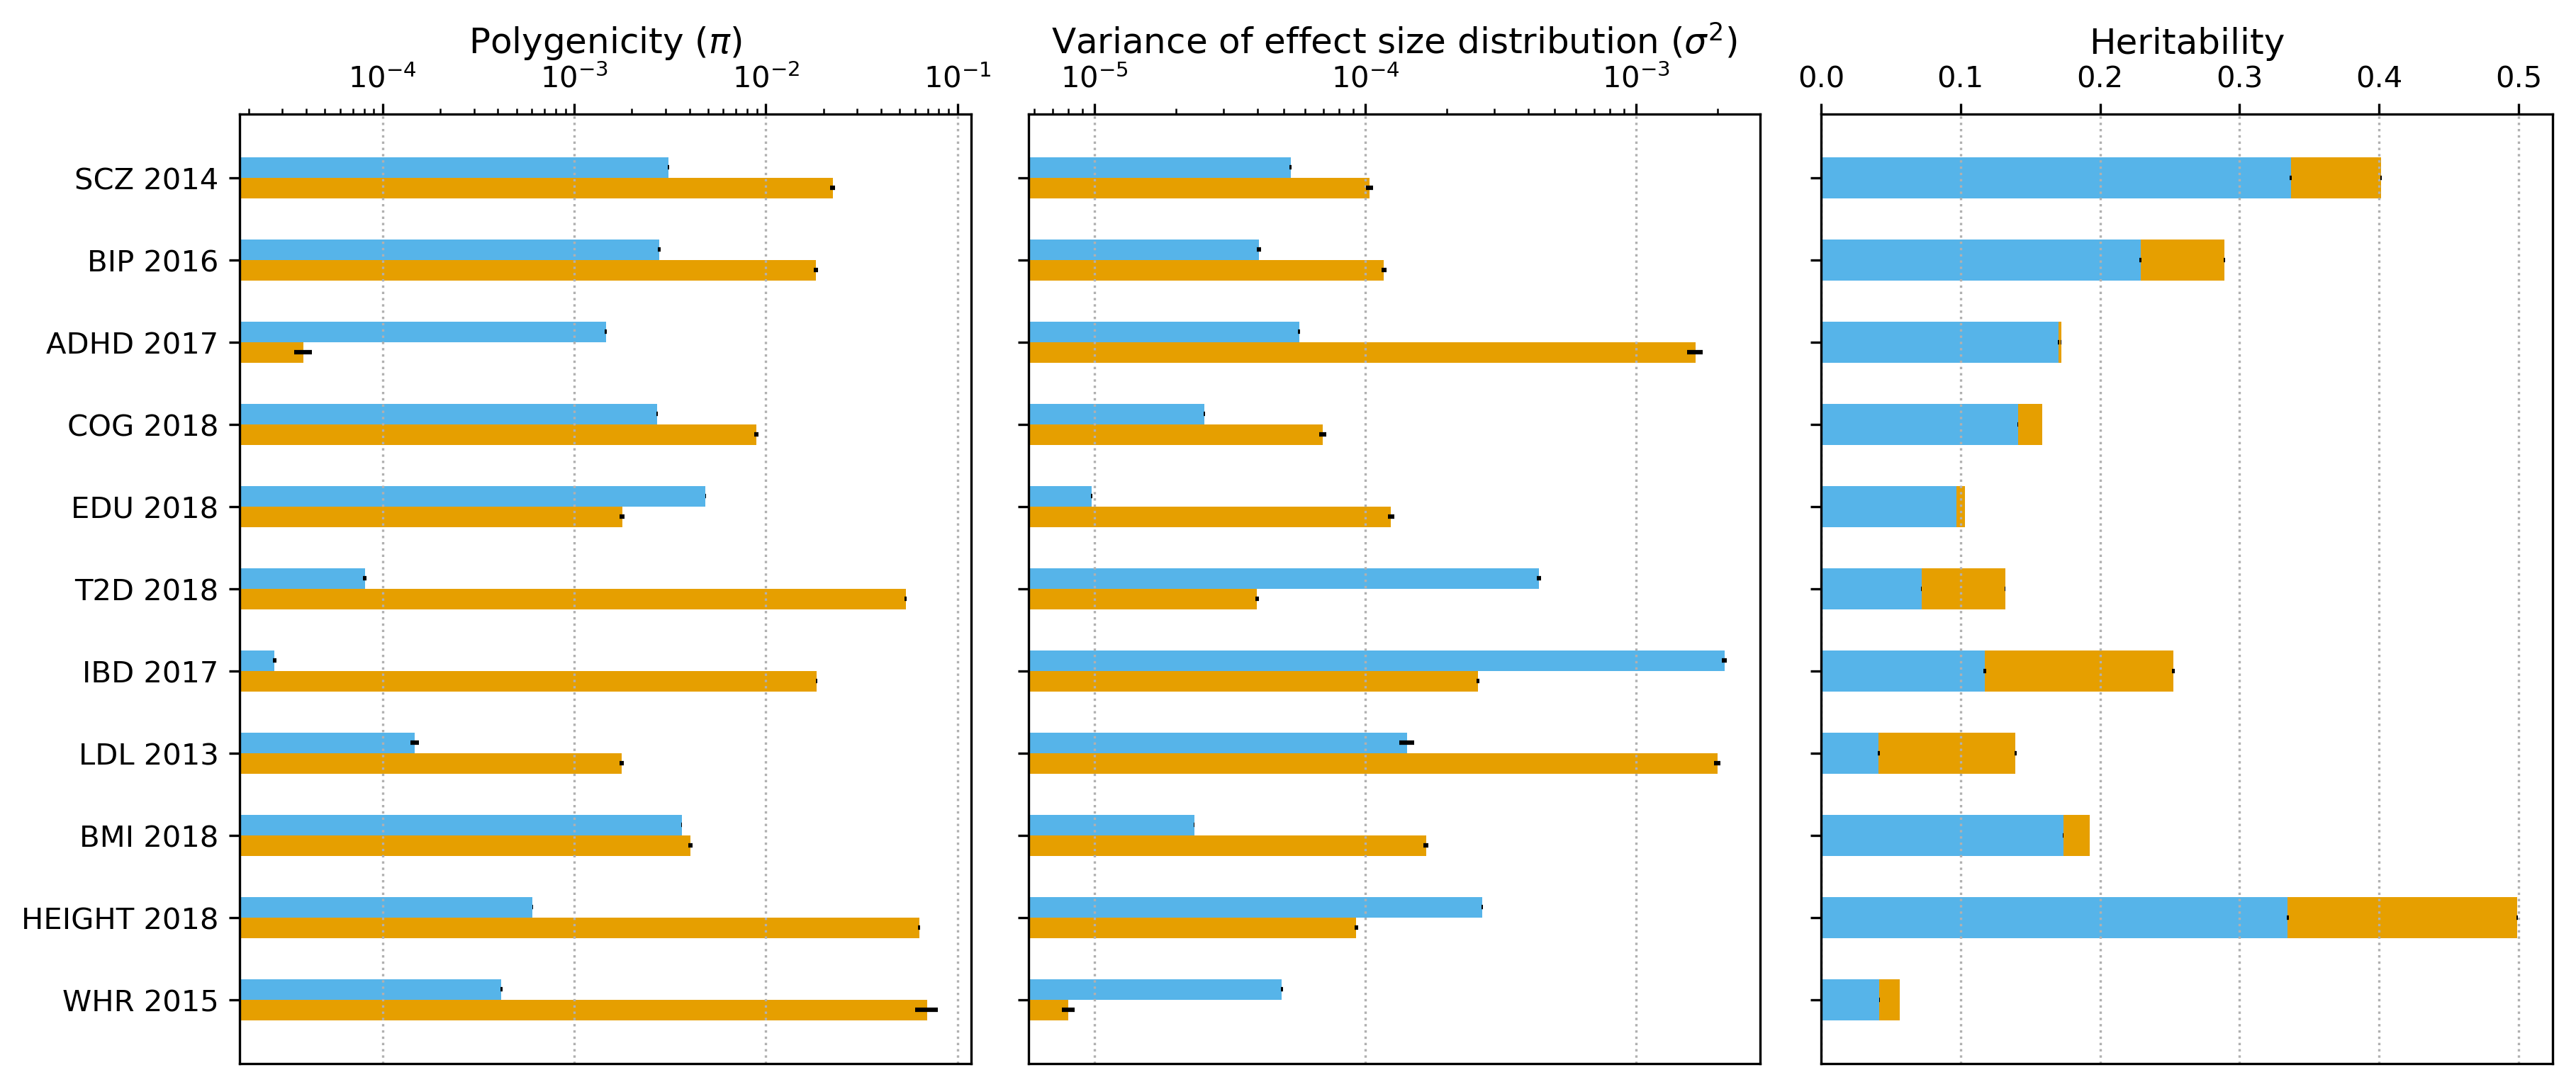

In [5]:
out_file = "parameters." + f"{len(traits)}traits" + ".png"
save = False
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,5), sharey=True, constrained_layout=True, dpi=300)
y_labels = [t.name for t in traits]
y_pos = range(len(traits))
width = 0.5
color_coding = "#e69f00"
color_noncoding = "#56b4e9"

## plot n
# n_causals_noncoding = [t.n_noncoding for t in traits]
# n_causals_coding = [t.n_coding for t in traits]
# noncoding_err = [t.n_noncoding_se*2 for t in traits]
# coding_err = [t.n_coding_se*2 for t in traits]
# axs[0].barh(y_pos, n_causals_noncoding, width, xerr=noncoding_err, color=color_noncoding, label="non-exonic")
# axs[0].barh(y_pos, n_causals_coding, width, xerr=coding_err, left=n_causals_noncoding, color=color_coding,
#             label="exonic")
# axs[0].invert_yaxis()  # labels read top-to-bottom
# axs[0].set_yticks(y_pos)
# axs[0].set_yticklabels(y_labels, fontsize=12)
# # axs[0].set_ylim([-0.5, 1.5])

# axs[0].set_xlabel('Number of non-null varinats', fontsize=12)
# axs[0].xaxis.set_label_position('top') 
# axs[0].xaxis.tick_top()
# # axs[0].set_xscale('log')
# # axs[0].set_xlim([1.E-5, 1.E-1])
# axs[0].legend(fontsize=12)
# axs[0].xaxis.grid(linestyle=':')

## plot p
p_noncoding = [t.p_noncoding for t in traits]
p_coding = [t.p_coding for t in traits]
p_noncoding_err = [t.p_noncoding_se*2 for t in traits]
p_coding_err = [t.p_coding_se*2 for t in traits]

axs[0].barh(y_pos, p_noncoding, -0.5*width, xerr=p_noncoding_err, align="edge", color=color_noncoding, label="non-exonic")
axs[0].barh(y_pos, p_coding, 0.5*width, xerr=p_coding_err, align="edge", color=color_coding, label="exonic")

axs[0].invert_yaxis()  # labels read top-to-bottom
axs[0].set_xlabel('Polygenicity ($\pi$)', fontsize=12)
axs[0].xaxis.set_label_position('top') 
axs[0].xaxis.tick_top()
axs[0].set_xscale('log')
axs[0].xaxis.grid(linestyle=':')


## plot s2
s_causals_noncoding = [t.s_noncoding for t in traits]
s_causals_coding = [t.s_coding for t in traits]
s_noncoding_err = [t.s_noncoding_se*2 for t in traits]
s_coding_err = [t.s_coding_se*2 for t in traits]
axs[1].barh(y_pos, s_causals_noncoding, -0.5*width, xerr=s_noncoding_err, align="edge", color=color_noncoding, label="non-exonic")
axs[1].barh(y_pos, s_causals_coding, 0.5*width, xerr=s_coding_err, align="edge", color=color_coding, label="exonic")

axs[1].set_xlabel('Variance of effect size distribution ($\sigma^{2}$)', fontsize=12)
axs[1].xaxis.set_label_position('top') 
axs[1].xaxis.tick_top()
axs[1].set_xscale('log')
# axs[1].set_xlim([1.E-5, 1.E-1])
# axs[1].legend(fontsize=12)
axs[1].xaxis.grid(linestyle=':')


h2_noncoding = [t.h2_noncoding for t in traits]
h2_coding = [t.h2_coding for t in traits]
h2_noncoding_err = [t.h2_noncoding_se*2 for t in traits]
h2_coding_err = [t.h2_coding_se*2 for t in traits]
axs[2].barh(y_pos, h2_noncoding, width, xerr=h2_noncoding_err, color=color_noncoding, label="non-exonic")
axs[2].barh(y_pos, h2_coding, width, xerr=h2_coding_err, left=h2_noncoding, color=color_coding, label="exonic")
axs[2].set_yticks(y_pos)
axs[2].set_yticklabels(y_labels, fontsize=12)
# axs[2].set_ylim([-0.5, 1.5])

axs[2].set_xlabel("Heritability", fontsize=12)
axs[2].xaxis.set_label_position('top') 
axs[2].xaxis.tick_top()
# axs[2].set_xscale('log')
# axs[2].set_xlim([1.E-5, 1.E-1])
# axs[2].legend(fontsize=12)
axs[2].xaxis.grid(linestyle=':')

if save:
    plt.savefig(out_file)

In [6]:
for t in traits: print(f"{t.name}\t{t.s_coding:.2E}\t{t.s_noncoding:.2E}")

SCZ 2014	1.04E-04	5.30E-05
BIP 2016	1.17E-04	4.05E-05
ADHD 2017	1.65E-03	5.69E-05
COG 2018	6.96E-05	2.54E-05
EDU 2018	1.24E-04	9.77E-06
T2D 2018	3.98E-05	4.37E-04
IBD 2017	2.61E-04	2.12E-03
LDL 2013	1.99E-03	1.42E-04
BMI 2018	1.67E-04	2.33E-05
HEIGHT 2018	9.26E-05	2.70E-04
WHR 2015	8.01E-06	4.92E-05


In [7]:
h2_cmm = []
enc_cmm = []
ec_cmm = []
for t in traits:
    name = t.name.replace(" ","_")
    h2 = t.h2_total
    h2_se = t.h2_total_se
    enrichment_c = t.enrichment_coding
    enrichment_nc = t.enrichment_noncoding
    enrichment_c_se = t.enrichment_coding_se
    enrichment_nc_se = t.enrichment_noncoding_se
    enrichment_nc_min = t.enrichment_noncoding_min
    enrichment_nc_max = t.enrichment_noncoding_max
    enrichment_c_min = t.enrichment_coding_min
    enrichment_c_max = t.enrichment_coding_max
    h2_noncoding_min=t.h2_noncoding_min
    h2_noncoding_max=t.h2_noncoding_max
    h2_coding_min=t.h2_coding_min
    h2_coding_max=t.h2_coding_max
    h2_cmm.append(h2)
    enc_cmm.append(enrichment_nc)
    ec_cmm.append(enrichment_c)
    h2_min = t.h2_min
    h2_max = t.h2_max
    print(f"{name}\t{h2:.2f}({h2-h2_min:.1E},{h2_max-h2:.1E})\t{enrichment_nc:.2f}({enrichment_nc-enrichment_nc_min:.1E},{enrichment_nc_max-enrichment_nc:.1E})\t{enrichment_c:.2f}({enrichment_c-enrichment_c_min:.1E},{enrichment_c_max-enrichment_c:.1E})")

SCZ_2014	0.40(4.7E-03,6.3E-03)	0.85(1.0E-02,8.9E-03)	10.63(5.8E-01,6.8E-01)
BIP_2016	0.29(5.6E-03,5.1E-03)	0.80(1.3E-02,1.2E-02)	13.69(8.0E-01,8.1E-01)
ADHD_2017	0.17(8.8E-03,4.9E-03)	1.01(8.3E-03,7.6E-03)	0.66(5.0E-01,5.4E-01)
COG_2018	0.16(2.2E-03,2.4E-03)	0.90(9.8E-03,9.9E-03)	7.23(6.4E-01,6.4E-01)
EDU_2018	0.10(1.1E-03,1.1E-03)	0.95(8.4E-03,5.3E-03)	3.96(3.5E-01,5.4E-01)
T2D_2018	0.13(4.6E-03,4.0E-03)	0.55(2.1E-02,1.8E-02)	30.06(1.1E+00,1.3E+00)
IBD_2017	0.25(1.2E-02,9.5E-03)	0.47(2.3E-02,2.7E-02)	35.30(1.7E+00,1.5E+00)
LDL_2013	0.14(1.6E-02,7.8E-03)	0.30(3.3E-02,2.5E-02)	46.51(1.6E+00,2.1E+00)
BMI_2018	0.19(1.7E-03,2.0E-03)	0.92(4.1E-03,5.7E-03)	6.50(3.7E-01,2.7E-01)
HEIGHT_2018	0.50(8.8E-03,4.1E-03)	0.68(9.5E-03,1.3E-02)	21.77(8.4E-01,6.2E-01)
WHR_2015	0.06(1.4E-03,1.5E-03)	0.75(1.2E-02,1.4E-02)	16.96(8.9E-01,7.8E-01)


In [8]:
ldsc_res_dir = "/mnt/c/Users/Алексей/Documents/MEGAsync/cmm_paper/data/e1_real/ldsc"
trait2use = ["PGC_SCZ_2014_EUR",
              "PGC_BIP_2016",
              "PGC_ADHD_2017_EUR",
              "CTG_COG_2018",
              "SSGAC_EDU_2018_no23andMe",
              "DIAGRAM_T2D_2018_adjBMI",
              "IIBDGC_IBD_2017",
              "LIPIDS_LDL_2013",
              "GIANT_BMI_2018_UKB_v2",
              "GIANT_HEIGHT_2018_UKB",
              "GIANT_WHR_2015_EUR"]
# trait2use = ["PGC_SCZ_2014_EUR",
#               "PGC_BIP_2016",
#               "CTG_COG_2018",
#               "SSGAC_EDU_2018_no23andMe",
#               "DIAGRAM_T2D_2018_adjBMI",
#               "IIBDGC_IBD_2017",
#               "GIANT_BMI_2018_UKB_v2",
#               "GIANT_HEIGHT_2018_UKB"]
h2_ldsc = []
enc_ldsc = []
enc_err_ldsc = []
ec_ldsc = []
ec_err_ldsc = []
names = []
for t in trait2use:
    log_fname = os.path.join(ldsc_res_dir, t+".log")
    with open(log_fname) as f:
        for l in f:
            if l.startswith("Total Observed scale h2"):
                tmp = l.split(":")[1].strip()
                tmp = tmp.replace("(","")
                tmp = tmp.replace(")","")
                h2, h2_se = map(float,tmp.split())
    res_fname = os.path.join(ldsc_res_dir, t+".results")
    df = pd.read_csv(res_fname,index_col="Category",sep='\t')
    enrichment_nc,enrichment_c = df.loc[["OTHERL2_0","UTR5UTR3EXONL2_0"],"Enrichment"]
    enrichment_nc_se,enrichment_c_se = df.loc[["OTHERL2_0","UTR5UTR3EXONL2_0"],"Enrichment_std_error"]
    name = "_".join(t.split("_")[1:3])
    names.append(name)
    h2_ldsc.append(h2)
    enc_ldsc.append(enrichment_nc)
    enc_err_ldsc.append(enrichment_nc_se)
    ec_ldsc.append(enrichment_c)
    ec_err_ldsc.append(enrichment_c_se)
    print(f"{name}\t{h2:.3f}({h2_se:.1E})\t{enrichment_nc:.3f}({enrichment_nc_se:.1E})\t{enrichment_c:.3f}({enrichment_c_se:.1E})")

SCZ_2014	0.372(1.7E-02)	0.909(1.6E-02)	7.638(1.2E+00)
BIP_2016	0.273(1.6E-02)	0.860(2.6E-02)	11.185(1.9E+00)
ADHD_2017	0.194(1.5E-02)	1.029(2.7E-02)	-1.106(1.9E+00)
COG_2018	0.162(6.6E-03)	0.935(1.4E-02)	5.694(1.0E+00)
EDU_2018	0.097(2.9E-03)	0.973(1.3E-02)	2.966(9.1E-01)
T2D_2018	0.127(9.5E-03)	0.665(4.2E-02)	25.293(3.1E+00)
IBD_2017	0.229(2.1E-02)	0.551(6.0E-02)	33.571(4.4E+00)
LDL_2013	0.143(1.7E-02)	0.498(9.1E-02)	37.445(6.6E+00)
BMI_2018	0.192(6.6E-03)	0.923(1.3E-02)	6.558(9.2E-01)
HEIGHT_2018	0.467(2.1E-02)	0.775(2.6E-02)	17.374(1.9E+00)
WHR_2015	0.074(5.5E-03)	0.843(3.1E-02)	12.420(2.3E+00)


In [9]:
h2_cmm = np.array(h2_cmm)
enc_cmm = np.array(enc_cmm)
ec_cmm = np.array(ec_cmm)
h2_ldsc = np.array(h2_ldsc)
enc_ldsc = np.array(enc_ldsc)
ec_ldsc = np.array(ec_ldsc)
h2_c_cmm = prop_n_c*h2_cmm*ec_cmm
h2_nc_cmm = prop_n_nc*h2_cmm*enc_cmm
h2_c_ldsc = prop_n_c*h2_ldsc*ec_ldsc
h2_c_err_ldsc = prop_n_c*h2_ldsc*ec_err_ldsc
h2_nc_ldsc = prop_n_nc*h2_ldsc*enc_ldsc
h2_nc_err_ldsc = prop_n_nc*h2_ldsc*enc_err_ldsc

In [10]:
df = pd.DataFrame({"trait":names,"h2_cmm":h2_cmm,"h2_ldsc":h2_ldsc,"h2_nc_cmm":h2_nc_cmm,"h2_nc_ldsc":h2_nc_ldsc,
                  "h2_c_cmm":h2_c_cmm,"h2_c_ldsc":h2_c_ldsc})

In [11]:
df

,trait,h2_cmm,h2_ldsc,h2_nc_cmm,h2_nc_ldsc,h2_c_cmm,h2_c_ldsc
0,SCZ_2014,0.401315,0.3717,0.336720,0.332608,0.064595,0.042995
1,BIP_2016,0.288904,0.2730,0.228998,0.231155,0.059906,0.046244
2,ADHD_2017,0.171985,0.1939,0.170274,0.196501,0.001711,-0.003247
3,COG_2018,0.158458,0.1620,0.141110,0.149234,0.017348,0.013969
4,EDU_2018,0.103183,0.0966,0.096993,0.092561,0.006190,0.004340
5,T2D_2018,0.131992,0.1273,0.071906,0.083432,0.060086,0.048760
6,IBD_2017,0.252404,0.2290,0.117482,0.124376,0.134921,0.116422
7,LDL_2013,0.139458,0.1430,0.041225,0.070154,0.098233,0.081090
8,BMI_2018,0.192605,0.1916,0.173637,0.174256,0.018968,0.019029
9,HEIGHT_2018,0.498938,0.4668,0.334410,0.356072,0.164528,0.122819


In [13]:
# estimate number of exonic and non-exonic variants required to reach 90% of h2 
df_het_other = pd.read_csv("ldsc489eur10m.other.snps.het.txt",header=None,names=["snp","het"],sep='\t')
df_het_exons = pd.read_csv("ldsc489eur10m.utr5utr3exon.snps.het.txt",header=None,names=["snp","het"],sep='\t')
df_het_all = df_het_other.append(df_het_exons,ignore_index=True)

In [14]:
def get_cdf_annot(n_other, sigma2_other, n_exons, sigma2_exons):
    eff_other = norm.rvs(0,sqrt(sigma2_other),n_other)
    eff_exons = norm.rvs(0,sqrt(sigma2_exons),n_exons)
    
    het_other = df_het_other.het.sample(n_other).values
    het_exons = df_het_exons.het.sample(n_exons).values
    
    het_eff2 = np.concatenate([het_other*(eff_other**2), het_exons*(eff_exons**2)])
    annot_i = np.zeros(n_other+n_exons,dtype=int)
    annot_i[-n_exons:] = 1
    
    i = np.argsort(het_eff2)
    het_eff2 = het_eff2[i]
    annot_i = annot_i[i]
    het_eff2 = het_eff2[::-1]
    annot_i = annot_i[::-1]
    
    cdf = np.cumsum(het_eff2/het_eff2.sum())
    return cdf, annot_i

In [15]:
def get_cdf(sigma2, n):
    eff = norm.rvs(0,sqrt(sigma2),n)
    het = df_het_all.het.sample(n).values
    het_eff2 = het*(eff**2)
    het_eff2.sort()
    het_eff2 = het_eff2[::-1]
    cdf = np.cumsum(het_eff2/het_eff2.sum())
    return cdf

0.31914


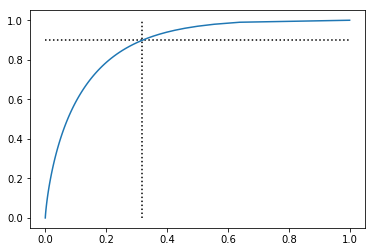

In [19]:
# no annotations
n = 10000
y = np.linspace(0,1,100)
x1 = np.searchsorted(get_cdf(1E-2,n),y)/n
x2 = np.searchsorted(get_cdf(1E-4,n),y)/n
x3 = np.searchsorted(get_cdf(1E-6,n),y)/n
x4 = np.searchsorted(get_cdf(1E-8,n),y)/n

plt.plot(x1,y)
# plt.plot(x2,y)
# plt.plot(x3,y)
# plt.plot(x4,y)

cdf = get_cdf(1E-4,n)
prop = np.searchsorted(cdf,0.9)/n
plt.vlines(prop,0,1,linestyles=':')
plt.hlines(0.9,0,1,linestyles=':')
print(prop)

In [250]:
for t in traits: print(f"{t.name}\t{t.n_coding:.1f}\t{t.n_noncoding:.1f}\t{t.s_coding:.2E}\t{t.s_noncoding:.2E}")

SCZ 2014	3383.8	30610.2	1.04E-04	5.30E-05
BIP 2016	2767.1	27321.5	1.17E-04	4.05E-05
ADHD 2017	5.8	14426.0	1.65E-03	5.69E-05
COG 2018	1352.1	26747.4	6.96E-05	2.54E-05
INTELLIGENCE 2017	1865.7	13941.4	7.80E-05	3.92E-05
EDU 2018	269.6	47809.3	1.24E-04	9.77E-06
T2D 2018	8134.0	794.7	3.98E-05	4.37E-04
IBD 2017	2788.2	268.9	2.61E-04	2.12E-03
LDL 2013	267.8	1448.1	1.99E-03	1.42E-04
BMI 2018	612.9	35833.6	1.67E-04	2.33E-05
HEIGHT 2014	7909.9	3466.3	7.48E-05	2.60E-04
HEIGHT 2018	9561.6	5966.2	9.26E-05	2.70E-04
WHR 2015	10556.2	4107.3	8.01E-06	4.92E-05


total: n = 3315, % = 100, prop = 0.291
exons: n = 2707, % = 81.7, prop = 0.342
other: n = 608, % = 18.3, prop = 0.175


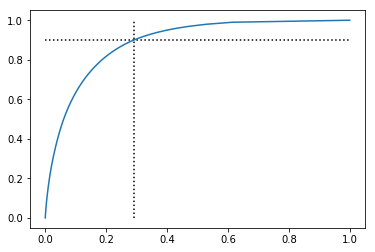

In [264]:
# with annotations
# the following parameters should be taken from optimization results for the trait
n_other = 4107
n_exons = 10556
n = n_other + n_exons
sigma2_other = 4.92E-05
sigma2_exons = 8.01E-06

y = np.linspace(0,1,100)
x1 = np.searchsorted(get_cdf_annot(n_other, sigma2_other, n_exons, sigma2_exons)[0],y)/n
# x2 = np.searchsorted(get_cdf(1E-4,n),y)/n
# x3 = np.searchsorted(get_cdf(1E-6,n),y)/n
# x4 = np.searchsorted(get_cdf(1E-8,n),y)/n

plt.plot(x1,y)
# plt.plot(x2,y)
# plt.plot(x3,y)
# plt.plot(x4,y)

cdf_annot, annot_i = get_cdf_annot(n_other, sigma2_other, n_exons, sigma2_exons)
n_to_take = np.searchsorted(cdf_annot,0.9)
n_exons_to_take = annot_i[:n_to_take].sum()
prop_total = n_to_take/n
prop_exons = n_exons_to_take/n_exons
n_other_to_take = n_to_take - n_exons_to_take
prop_other = n_other_to_take/n_other

plt.vlines(prop_total,0,1,linestyles=':')
plt.hlines(0.9,0,1,linestyles=':')

print(f"total: n = {n_to_take}, % = 100, prop = {prop_total:.3f}")
print(f"exons: n = {n_exons_to_take}, % = {100*n_exons_to_take/n_to_take:.1f}, prop = {prop_exons:.3f}")
print(f"other: n = {n_other_to_take}, % = {100*n_other_to_take/n_to_take:.1f}, prop = {prop_other:.3f}")

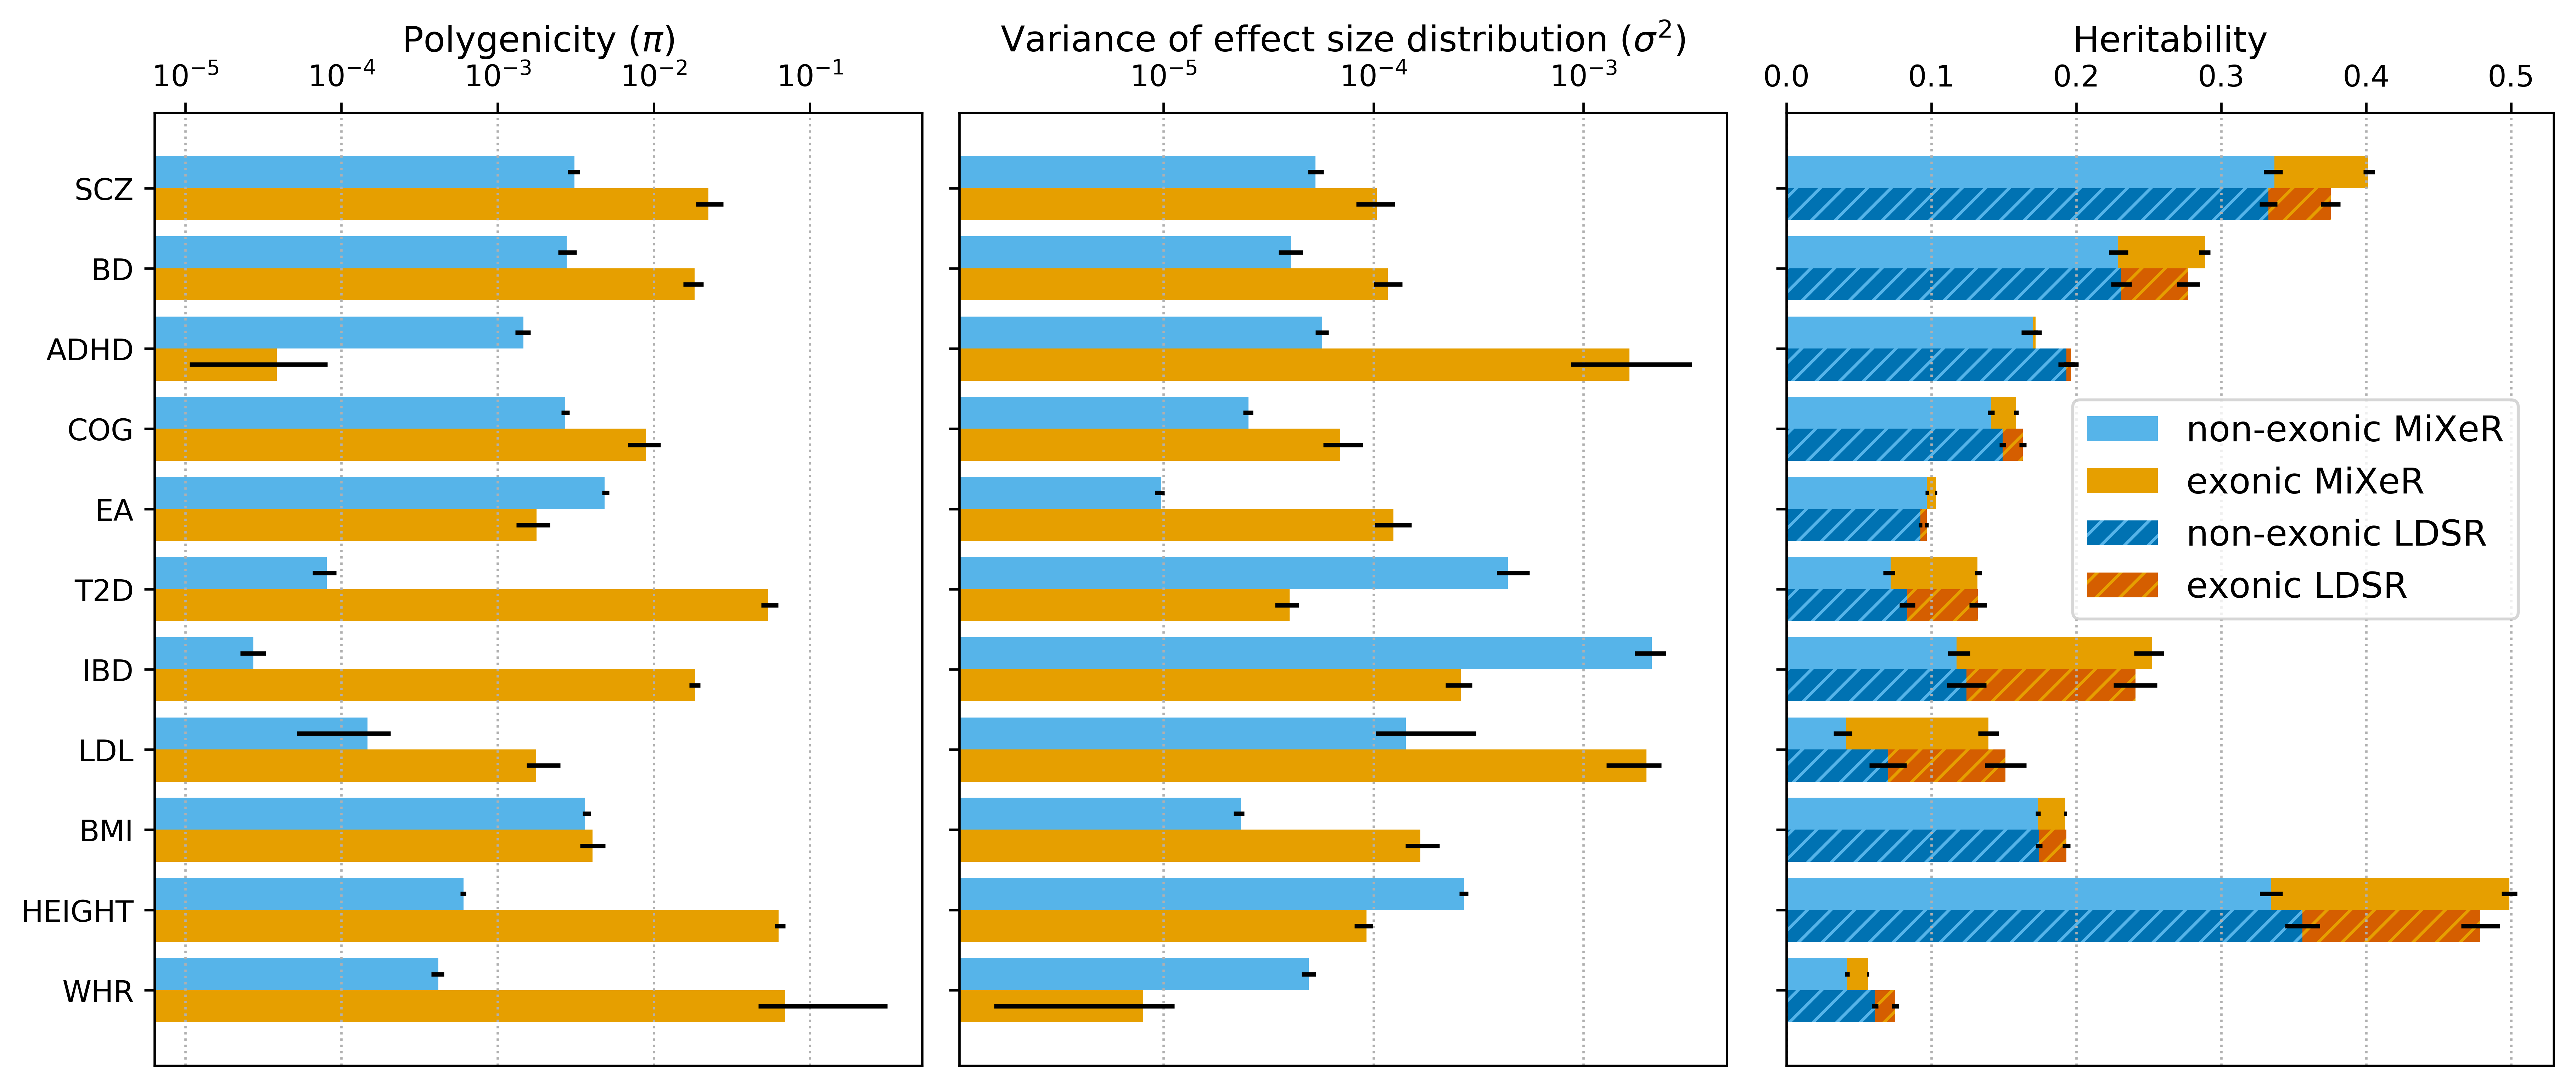

In [25]:
# plot with LDSR h2 comparison
# #             orange, sky_blue, bluish_green, yellow, reddish_purple, vermillion, blue, black
# CB_COLORS = ["#e69f00","#56b4e9","#009e73","#f0e442","#cc79a7","#d55e00","#0072b2","#000000"]
out_file = "parameters.polygenicity." + f"{len(traits)}traits.min_max_err.with_ldsr.08" + ".png"

save = True
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,5), sharey=True, constrained_layout=True, dpi=600)
y_labels = [t.name.split()[0] for t in traits]
# replace BIP with BD and EDU with EA
replace_dict = {"BIP":"BD","EDU":"EA"}
y_labels = [replace_dict.get(t,t) for t in y_labels]
y_pos = range(len(traits))
width = 0.8
color_coding = "#e69f00"
color_noncoding = "#56b4e9"
color_coding_ldsr = "#d55e00"
color_noncoding_ldsr = "#0072b2"

## plot n
# n_causals_noncoding = [t.n_noncoding for t in traits]
# n_causals_coding = [t.n_coding for t in traits]
# noncoding_err = [t.n_noncoding_se*2 for t in traits]
# coding_err = [t.n_coding_se*2 for t in traits]
# axs[0].barh(y_pos, n_causals_noncoding, width, xerr=noncoding_err, color=color_noncoding, label="non-exonic")
# axs[0].barh(y_pos, n_causals_coding, width, xerr=coding_err, left=n_causals_noncoding, color=color_coding,
#             label="exonic")
# axs[0].invert_yaxis()  # labels read top-to-bottom
# axs[0].set_yticks(y_pos)
# axs[0].set_yticklabels(y_labels, fontsize=12)
# # axs[0].set_ylim([-0.5, 1.5])

# axs[0].set_xlabel('Number of non-null varinats', fontsize=12)
# axs[0].xaxis.set_label_position('top') 
# axs[0].xaxis.tick_top()
# # axs[0].set_xscale('log')
# # axs[0].set_xlim([1.E-5, 1.E-1])
# axs[0].legend(fontsize=12)
# axs[0].xaxis.grid(linestyle=':')


## plot p
p_noncoding = [t.p_noncoding for t in traits]
p_coding = [t.p_coding for t in traits]
# p_noncoding_err = [t.p_noncoding_se*2 for t in traits]
# p_coding_err = [t.p_coding_se*2 for t in traits]
p_coding_err_min = [t.p_coding_err_min for t in traits]
p_coding_err_max = [t.p_coding_err_max for t in traits]
p_coding_err = [p_coding_err_min,p_coding_err_max]
p_noncoding_err_min = [t.p_noncoding_err_min for t in traits]
p_noncoding_err_max = [t.p_noncoding_err_max for t in traits]
p_noncoding_err = [p_noncoding_err_min,p_noncoding_err_max]

axs[0].barh(y_pos, p_noncoding, -0.5*width, xerr=p_noncoding_err, align="edge", color=color_noncoding, label="non-exonic")
axs[0].barh(y_pos, p_coding, 0.5*width, xerr=p_coding_err, align="edge", color=color_coding, label="exonic")

axs[0].invert_yaxis()  # labels read top-to-bottom
axs[0].set_xlabel('Polygenicity ($\pi$)', fontsize=12)
axs[0].xaxis.set_label_position('top') 
axs[0].xaxis.tick_top()
axs[0].set_xscale('log')
axs[0].xaxis.grid(linestyle=':')


## plot s2
s_causals_noncoding = [t.s_noncoding for t in traits]
s_causals_coding = [t.s_coding for t in traits]
# s_noncoding_err = [t.s_noncoding_se*2 for t in traits]
# s_coding_err = [t.s_coding_se*2 for t in traits]
s_coding_err_min = [t.s_coding_err_min for t in traits]
s_coding_err_max = [t.s_coding_err_max for t in traits]
s_coding_err = [s_coding_err_min,s_coding_err_max]
s_noncoding_err_min = [t.s_noncoding_err_min for t in traits]
s_noncoding_err_max = [t.s_noncoding_err_max for t in traits]
s_noncoding_err = [s_noncoding_err_min,s_noncoding_err_max]
axs[1].barh(y_pos, s_causals_noncoding, -0.5*width, xerr=s_noncoding_err, align="edge", color=color_noncoding, label="non-exonic")
axs[1].barh(y_pos, s_causals_coding, 0.5*width, xerr=s_coding_err, align="edge", color=color_coding, label="exonic")

axs[1].set_xlabel('Variance of effect size distribution ($\sigma^{2}$)', fontsize=12)
axs[1].xaxis.set_label_position('top') 
axs[1].xaxis.tick_top()
axs[1].set_xscale('log')
# axs[1].set_xlim([1.E-5, 1.E-1])
# axs[1].legend(fontsize=12)
axs[1].xaxis.grid(linestyle=':')


h2_noncoding = [t.h2_noncoding for t in traits]
h2_coding = [t.h2_coding for t in traits]
# h2_noncoding_err = [t.h2_noncoding_se*2 for t in traits]
# h2_coding_err = [t.h2_coding_se*2 for t in traits]
h2_coding_err_min = [t.h2_coding_err_min for t in traits]
h2_coding_err_max = [t.h2_coding_err_max for t in traits]
h2_coding_err = [h2_coding_err_min,h2_coding_err_max]
h2_noncoding_err_min = [t.h2_noncoding_err_min for t in traits]
h2_noncoding_err_max = [t.h2_noncoding_err_max for t in traits]
h2_noncoding_err = [h2_noncoding_err_min,h2_noncoding_err_max]

axs[2].barh(y_pos, h2_noncoding, -0.5*width, xerr=h2_noncoding_err, align="edge", color=color_noncoding, label="non-exonic MiXeR")
axs[2].barh(y_pos, h2_coding, -0.5*width, xerr=h2_coding_err, left=h2_noncoding, align="edge", color=color_coding, label="exonic MiXeR")
axs[2].barh(y_pos, h2_nc_ldsc, 0.5*width, xerr=h2_nc_err_ldsc, align="edge", hatch="///", linewidth=0, edgecolor="#56b4e9", color=color_noncoding_ldsr, label="non-exonic LDSR")
axs[2].barh(y_pos, h2_c_ldsc, 0.5*width, xerr=h2_c_err_ldsc, left=h2_nc_ldsc, align="edge", hatch="///", linewidth=0, edgecolor="#e69f00", color=color_coding_ldsr, label="exonic LDSR")
# axs[2].barh(y_pos, h2_nc_ldsc, 0.5*width, xerr=h2_nc_err_ldsc, align="edge", color=color_noncoding_ldsr, label="non-exonic LDSR")
# axs[2].barh(y_pos, h2_c_ldsc, 0.5*width, xerr=h2_c_err_ldsc, left=h2_nc_ldsc, align="edge", color=color_coding_ldsr, label="exonic LDSR")
axs[2].set_yticks(y_pos)
axs[2].set_yticklabels(y_labels, fontsize=12)
# axs[2].set_ylim([-0.5, 1.5])

axs[2].set_xlabel("Heritability", fontsize=12)
axs[2].xaxis.set_label_position('top') 
axs[2].xaxis.tick_top()
# axs[2].set_xscale('log')
# axs[2].set_xlim([1.E-5, 1.E-1])
# axs[2].legend(fontsize=12)
axs[2].xaxis.grid(linestyle=':')
axs[2].legend(bbox_to_anchor=(0.35,0.45),loc='lower left',fontsize=12)

for ax in axs:
    ax.minorticks_off()

if save:
    plt.savefig(out_file)

In [58]:
h2_noncoding_err

[[0.3294783142450914,
  0.22267312026494934,
  0.16207868742733825,
  0.1389214481830619,
  0.09597952313008112,
  0.06684116212040375,
  0.1112388850175388,
  0.03257929615856491,
  0.1719190190641718,
  0.3267088912014429,
  0.040521408388751116],
 [0.3423097871112292,
  0.2356542826808441,
  0.1760171558657008,
  0.14360257379044364,
  0.0982887222070572,
  0.07500248469498558,
  0.126657166871582,
  0.04533129980673485,
  0.17529109224394732,
  0.34233576266109594,
  0.04363776869381615]]

In [109]:
for t in traits:
    print(f"{t.p_noncoding:.2E}\t{t.p_coding:.2E}\t{t.s_noncoding:.2E}\t{t.s_coding:.2E}\t{t.n_noncoding:.0f}\t{t.n_coding:.0f}\t{t.s02:.2f}")

3.11E-03	2.24E-02	5.30E-05	1.04E-04	30610	3384	1.13
2.77E-03	1.83E-02	4.05E-05	1.17E-04	27322	2767	1.06
1.47E-03	3.86E-05	5.69E-05	1.65E-03	14426	6	1.11
2.72E-03	8.93E-03	2.54E-05	6.96E-05	26747	1352	1.22
4.86E-03	1.78E-03	9.77E-06	1.24E-04	47809	270	1.20
8.07E-05	5.37E-02	4.37E-04	3.98E-05	795	8134	1.18
2.73E-05	1.84E-02	2.12E-03	2.61E-04	269	2788	1.20
1.47E-04	1.77E-03	1.42E-04	1.99E-03	1448	268	0.96
3.64E-03	4.05E-03	2.33E-05	1.67E-04	35834	613	1.61
6.06E-04	6.32E-02	2.70E-04	9.26E-05	5966	9562	2.41
4.17E-04	6.97E-02	4.92E-05	8.01E-06	4107	10556	0.94


In [86]:
t2d = 8134.0+794.7
ldl = 267.8+1448.1
t2d/ldl

5.203508362958215

In [88]:
100*267.8/ldl

15.606970103152866

In [93]:
2.0E-03/4.0E-05

50.0

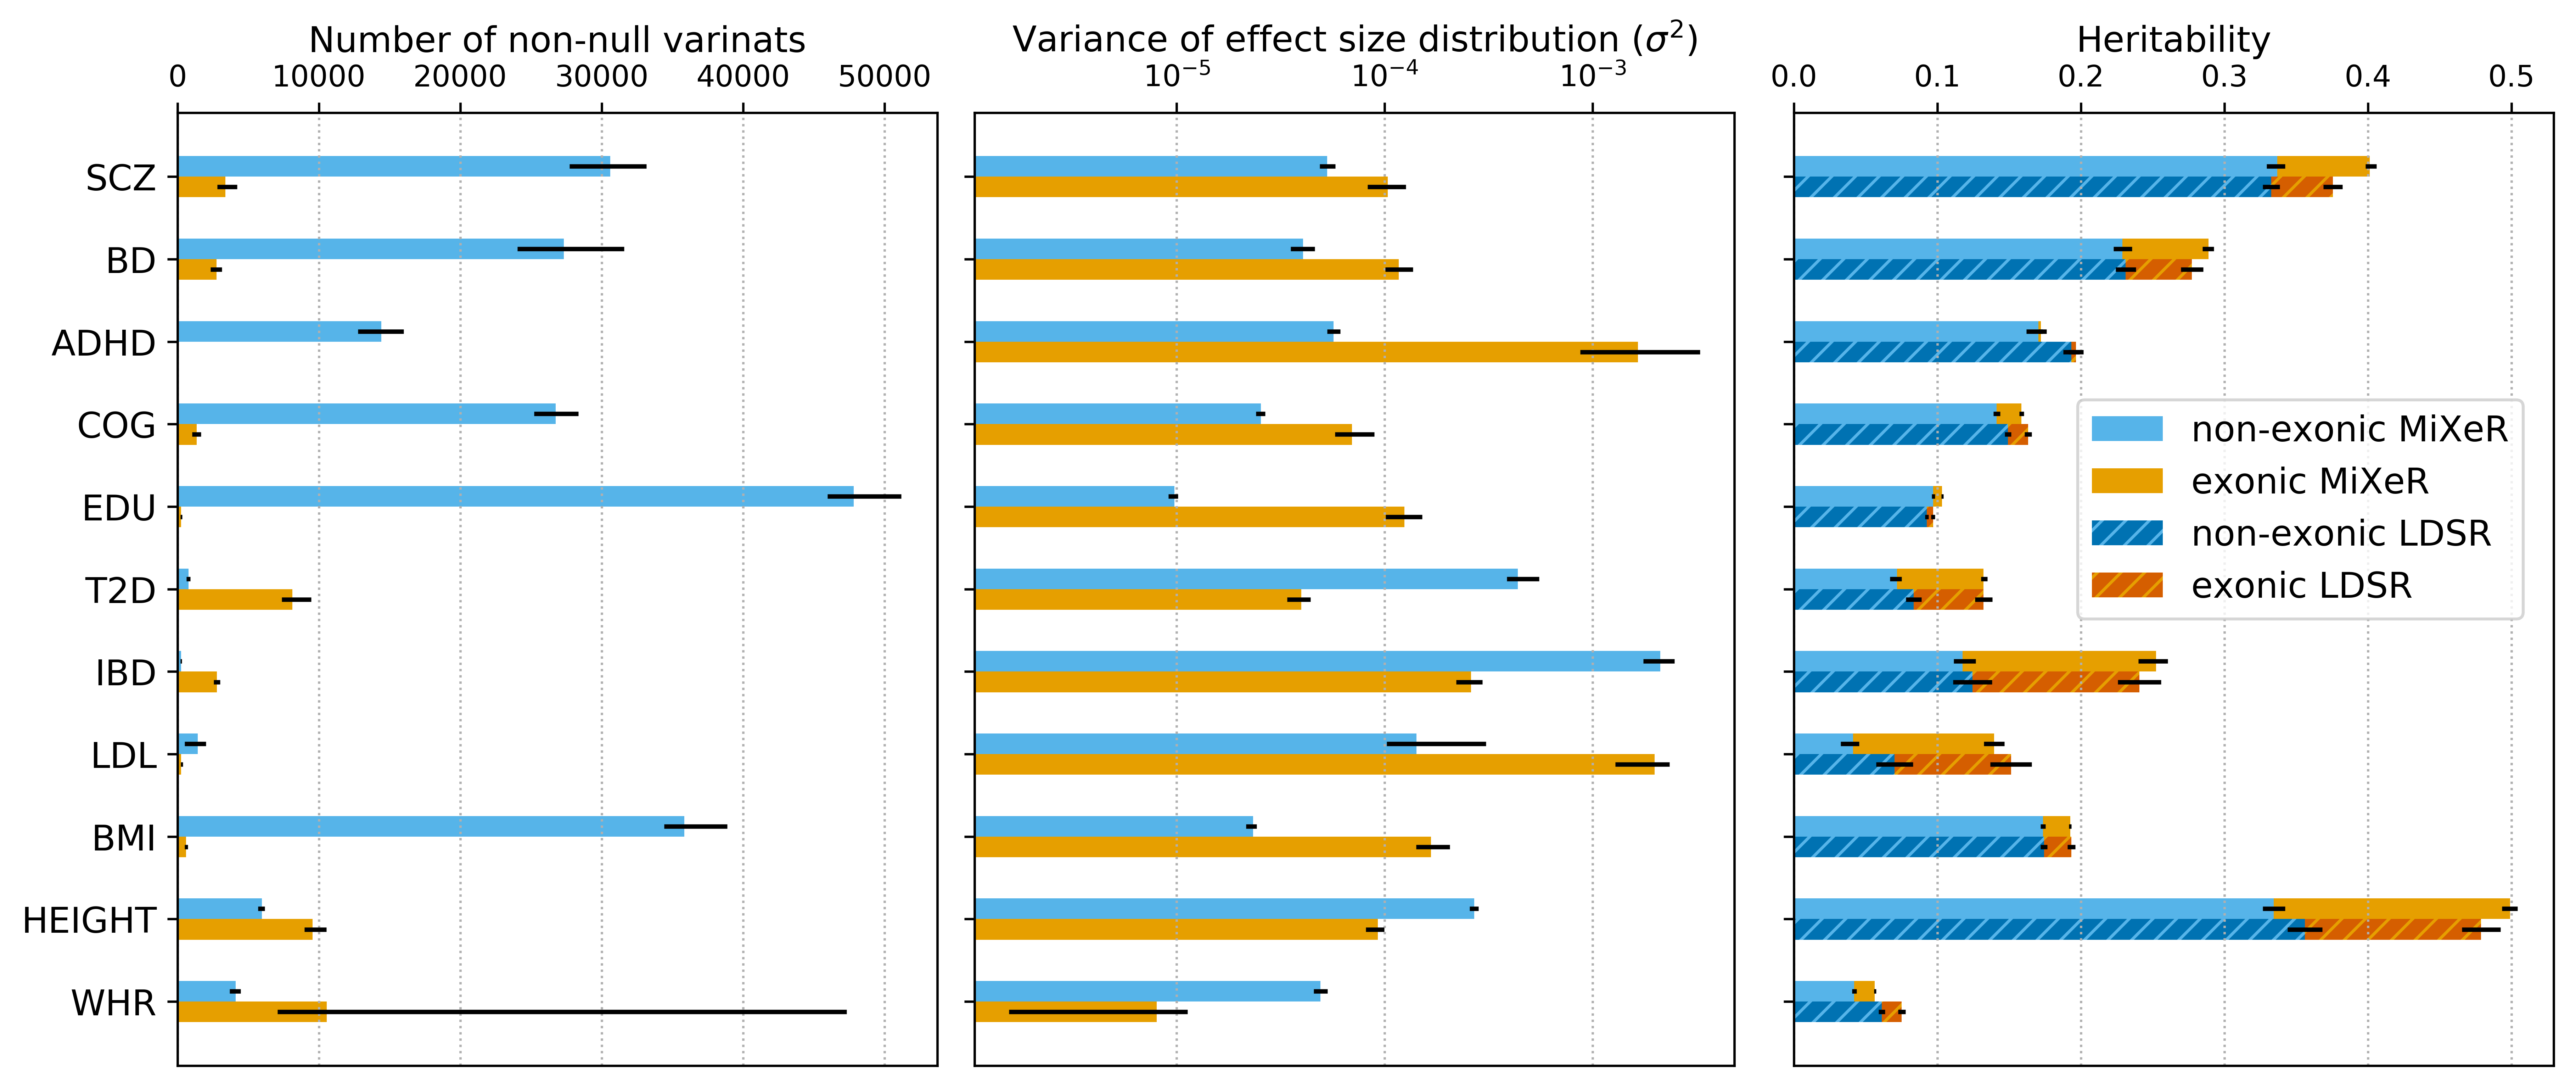

In [27]:
# plot with LDSR h2 comparison
# #             orange, sky_blue, bluish_green, yellow, reddish_purple, vermillion, blue, black
# CB_COLORS = ["#e69f00","#56b4e9","#009e73","#f0e442","#cc79a7","#d55e00","#0072b2","#000000"]
out_file = "parameters.n_nonnull." + f"{len(traits)}traits.min_max_err.with_ldsr" + ".png"

save = True
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,5), sharey=True, constrained_layout=True, dpi=600)
y_labels = [t.name.split()[0] for t in traits]
# replace BIP with BD
y_labels = ["BD" if t == "BIP" else t for t in y_labels]
y_pos = range(len(traits))
width = 0.5
color_coding = "#e69f00"
color_noncoding = "#56b4e9"
color_coding_ldsr = "#d55e00"
color_noncoding_ldsr = "#0072b2"

## plot n
n_causals_noncoding = [t.n_noncoding for t in traits]
n_causals_coding = [t.n_coding for t in traits]
# noncoding_err = [t.n_noncoding_se*2 for t in traits]
# coding_err = [t.n_coding_se*2 for t in traits]
n_coding_err_min = [t.n_coding_err_min for t in traits]
n_coding_err_max = [t.n_coding_err_max for t in traits]
n_coding_err = [n_coding_err_min,n_coding_err_max]
n_noncoding_err_min = [t.n_noncoding_err_min for t in traits]
n_noncoding_err_max = [t.n_noncoding_err_max for t in traits]
n_noncoding_err = [n_noncoding_err_min,n_noncoding_err_max]

axs[0].barh(y_pos, n_causals_noncoding, -0.5*width, xerr=n_noncoding_err, align="edge", color=color_noncoding, label="non-exonic")
axs[0].barh(y_pos, n_causals_coding, 0.5*width, xerr=n_coding_err, align="edge", color=color_coding, label="exonic")

# axs[0].barh(y_pos, n_causals_coding, width, xerr=n_coding_err, color=color_coding, label="exonic")
# axs[0].barh(y_pos, n_causals_noncoding, width, xerr=n_noncoding_err, left=n_causals_coding, color=color_noncoding,
#             label="non-exonic")
axs[0].invert_yaxis()  # labels read top-to-bottom
axs[0].set_yticks(y_pos)
axs[0].set_yticklabels(y_labels, fontsize=12)
# axs[0].set_ylim([-0.5, 1.5])

axs[0].set_xlabel('Number of non-null varinats', fontsize=12)
axs[0].xaxis.set_label_position('top') 
axs[0].xaxis.tick_top()
# axs[0].set_xscale('log')
# axs[0].set_xlim([1.E-5, 1.E-1])
# axs[0].legend(fontsize=12)
axs[0].xaxis.grid(linestyle=':')


## plot p
# p_noncoding = [t.p_noncoding for t in traits]
# p_coding = [t.p_coding for t in traits]
# # p_noncoding_err = [t.p_noncoding_se*2 for t in traits]
# # p_coding_err = [t.p_coding_se*2 for t in traits]
# p_coding_err_min = [t.p_coding_err_min for t in traits]
# p_coding_err_max = [t.p_coding_err_max for t in traits]
# p_coding_err = [p_coding_err_min,p_coding_err_max]
# p_noncoding_err_min = [t.p_noncoding_err_min for t in traits]
# p_noncoding_err_max = [t.p_noncoding_err_max for t in traits]
# p_noncoding_err = [p_noncoding_err_min,p_noncoding_err_max]

# axs[0].barh(y_pos, p_noncoding, -0.5*width, xerr=p_noncoding_err, align="edge", color=color_noncoding, label="non-exonic")
# axs[0].barh(y_pos, p_coding, 0.5*width, xerr=p_coding_err, align="edge", color=color_coding, label="exonic")

# axs[0].invert_yaxis()  # labels read top-to-bottom
# axs[0].set_xlabel('Polygenicity ($\pi$)', fontsize=12)
# axs[0].xaxis.set_label_position('top') 
# axs[0].xaxis.tick_top()
# axs[0].set_xscale('log')
# axs[0].xaxis.grid(linestyle=':')


## plot s2
s_causals_noncoding = [t.s_noncoding for t in traits]
s_causals_coding = [t.s_coding for t in traits]
# s_noncoding_err = [t.s_noncoding_se*2 for t in traits]
# s_coding_err = [t.s_coding_se*2 for t in traits]
s_coding_err_min = [t.s_coding_err_min for t in traits]
s_coding_err_max = [t.s_coding_err_max for t in traits]
s_coding_err = [s_coding_err_min,s_coding_err_max]
s_noncoding_err_min = [t.s_noncoding_err_min for t in traits]
s_noncoding_err_max = [t.s_noncoding_err_max for t in traits]
s_noncoding_err = [s_noncoding_err_min,s_noncoding_err_max]
axs[1].barh(y_pos, s_causals_noncoding, -0.5*width, xerr=s_noncoding_err, align="edge", color=color_noncoding, label="non-exonic")
axs[1].barh(y_pos, s_causals_coding, 0.5*width, xerr=s_coding_err, align="edge", color=color_coding, label="exonic")

axs[1].set_xlabel('Variance of effect size distribution ($\sigma^{2}$)', fontsize=12)
axs[1].xaxis.set_label_position('top') 
axs[1].xaxis.tick_top()
axs[1].set_xscale('log')
# axs[1].set_xlim([1.E-5, 1.E-1])
# axs[1].legend(fontsize=12)
axs[1].xaxis.grid(linestyle=':')


h2_noncoding = [t.h2_noncoding for t in traits]
h2_coding = [t.h2_coding for t in traits]
# h2_noncoding_err = [t.h2_noncoding_se*2 for t in traits]
# h2_coding_err = [t.h2_coding_se*2 for t in traits]
h2_coding_err_min = [t.h2_coding_err_min for t in traits]
h2_coding_err_max = [t.h2_coding_err_max for t in traits]
h2_coding_err = [h2_coding_err_min,h2_coding_err_max]
h2_noncoding_err_min = [t.h2_noncoding_err_min for t in traits]
h2_noncoding_err_max = [t.h2_noncoding_err_max for t in traits]
h2_noncoding_err = [h2_noncoding_err_min,h2_noncoding_err_max]

axs[2].barh(y_pos, h2_noncoding, -0.5*width, xerr=h2_noncoding_err, align="edge", color=color_noncoding, label="non-exonic MiXeR")
axs[2].barh(y_pos, h2_coding, -0.5*width, xerr=h2_coding_err, left=h2_noncoding, align="edge", color=color_coding, label="exonic MiXeR")
axs[2].barh(y_pos, h2_nc_ldsc, 0.5*width, xerr=h2_nc_err_ldsc, align="edge", hatch="///", linewidth=0, edgecolor="#56b4e9", color=color_noncoding_ldsr, label="non-exonic LDSR")
axs[2].barh(y_pos, h2_c_ldsc, 0.5*width, xerr=h2_c_err_ldsc, left=h2_nc_ldsc, align="edge", hatch="///", linewidth=0, edgecolor="#e69f00", color=color_coding_ldsr, label="exonic LDSR")
# axs[2].barh(y_pos, h2_nc_ldsc, 0.5*width, xerr=h2_nc_err_ldsc, align="edge", color=color_noncoding_ldsr, label="non-exonic LDSR")
# axs[2].barh(y_pos, h2_c_ldsc, 0.5*width, xerr=h2_c_err_ldsc, left=h2_nc_ldsc, align="edge", color=color_coding_ldsr, label="exonic LDSR")
axs[2].set_yticks(y_pos)
axs[2].set_yticklabels(y_labels, fontsize=12)
# axs[2].set_ylim([-0.5, 1.5])

axs[2].set_xlabel("Heritability", fontsize=12)
axs[2].xaxis.set_label_position('top') 
axs[2].xaxis.tick_top()
# axs[2].set_xscale('log')
# axs[2].set_xlim([1.E-5, 1.E-1])
# axs[2].legend(fontsize=12)
axs[2].xaxis.grid(linestyle=':')
axs[2].legend(bbox_to_anchor=(0.35,0.45),loc='lower left',fontsize=12)

for ax in axs:
    ax.minorticks_off()

if save:
    plt.savefig(out_file)